In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [249]:
data=pd.read_excel('Train_dataset.xlsx')

In [250]:
def get_class(x):
    if(x>50):
        return 1
    return 0
data['class']=data['Infect_Prob'].apply(get_class)
print(data)

       people_ID        Region  Gender Designation                 Name  \
0              1  Bhubaneshwar  Female         Mrs                mansi   
1              2  Bhubaneshwar  Female         Mrs            riya masi   
2              3  Bhubaneshwar  Female         Mrs               sunita   
3              4  Bhubaneshwar  Female         Mrs       anjali @ babli   
4              5  Bhubaneshwar  Female         Mrs      champa karketta   
...          ...           ...     ...         ...                  ...   
10709      22691     Bengaluru    Male          Mr               ashish   
10710      22692     Bengaluru    Male          Mr  mohd mujahid ansari   
10711      22693     Bengaluru    Male          Mr           munnakumar   
10712      22694     Bengaluru    Male          Mr              prakash   
10713      22695     Bengaluru    Male          Mr      mehboob mehandi   

      Married  Children     Occupation Mode_transport  cases/1M  ...  d-dimer  \
0         YES     

In [251]:
data.fillna(method ='ffill', inplace = True) 
data.isnull().sum().sort_values(ascending=False)

class                     0
Coma score                0
Region                    0
Gender                    0
Designation               0
Name                      0
Married                   0
Children                  0
Occupation                0
Mode_transport            0
cases/1M                  0
Deaths/1M                 0
comorbidity               0
Age                       0
Pulmonary score           0
Infect_Prob               0
cardiological pressure    0
Diuresis                  0
Platelets                 0
HBB                       0
d-dimer                   0
Heart rate                0
HDL cholesterol           0
Charlson Index            0
Blood Glucose             0
Insurance                 0
salary                    0
FT/month                  0
people_ID                 0
dtype: int64

In [252]:
df_no_missing = data

In [253]:
def find_outliers_tukey(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    #data.drop(data.index[outlier_indices], inplace=True)
    return outlier_indices, outlier_values

In [254]:
columns_to_check_outliers=['Children','cases/1M','HBB','d-dimer','Heart rate','HDL cholesterol','Charlson Index','Charlson Index','Blood Glucose','Insurance','salary','FT/month','Infect_Prob']

In [255]:
for i in columns_to_check_outliers:
    temp1=i+'_indices'
    temp2=i+'_values'
    temp1, temp2 = find_outliers_tukey(df_no_missing[i])
    print("Outliers for ",i)
    print(np.sort(temp2))
data.drop(data.index[temp1], inplace=True)

Outliers for  Children
[]
Outliers for  cases/1M
[8 8 8 ... 8 8 8]
Outliers for  HBB
[]
Outliers for  d-dimer
[]
Outliers for  Heart rate
[]
Outliers for  HDL cholesterol
[]
Outliers for  Charlson Index
[]
Outliers for  Charlson Index
[]
Outliers for  Blood Glucose
[]
Outliers for  Insurance
[]
Outliers for  salary
[]
Outliers for  FT/month
[]
Outliers for  Infect_Prob
[29.2896 29.2896 29.2896 ... 97.632  97.632  97.632 ]


In [256]:
import matplotlib.pyplot as plt
%matplotlib inline

['<400' '<100' '<200' '<300']


(array([2328.,    0.,    0., 2318.,    0.,    0., 2325.,    0.,    0.,
        2323.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

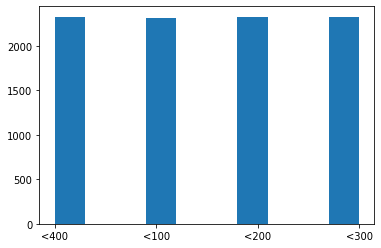

In [257]:
#plt.figure(figsize=(12,6))
print(df_no_missing['Pulmonary score'].unique())
plt.hist(df_no_missing['Pulmonary score'])

(array([ 38.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  38.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  29.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  38.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  20.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  28.,   0.,   1.,   0.,   1.,   1.,   1.,   2.,   3.,   1.,
          4.,   4.,  10.,   9.,  57.,  15.,  10.,  14.,  20.,  24.,  32.,
         24.,  38.,  44.,  35.,  42.,  49.,  50.,  76.,  50.,  48.,  72.,
         76.,  68.,  74.,  88.,  58.,  89.,  99., 111., 103., 129.,  87.,
        113., 112., 102., 127., 110., 120., 120., 122., 111., 113., 110.,
         98., 160., 121., 100.,  98., 115.,  97., 112., 107., 126.,  99.,
         92., 111., 116., 131.,  94.,  98.,  94.,  97.,  91.,  79.,  98.,
         88.,  88.,  89.,  99.,  88., 

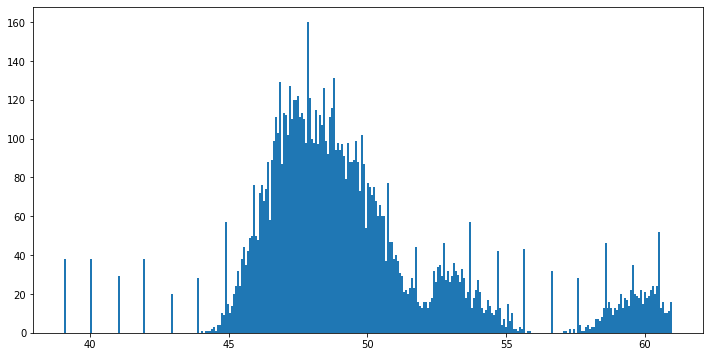

In [258]:
plt.figure(figsize=(12,6))
plt.hist(df_no_missing['Infect_Prob'],305)

In [259]:
df_no_missing['cardiological pressure'].unique()

array(['Normal', 'Stage-02', 'Stage-01', 'Elevated'], dtype=object)

In [260]:
#plt.hist(df_no_missing['cardiological pressure'])

(array([2328.,    0.,    0., 2318.,    0.,    0., 2325.,    0.,    0.,
        2323.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

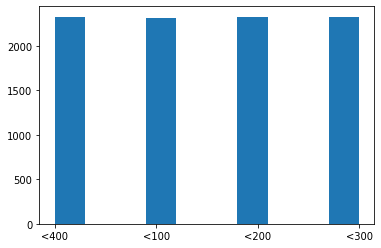

In [261]:
 plt.hist(df_no_missing['Pulmonary score'])

In [262]:
df_no_missing.columns

Index(['people_ID', 'Region', 'Gender', 'Designation', 'Name', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cases/1M', 'Deaths/1M',
       'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB', 'd-dimer',
       'Heart rate', 'HDL cholesterol', 'Charlson Index', 'Blood Glucose',
       'Insurance', 'salary', 'FT/month', 'Infect_Prob', 'class'],
      dtype='object')

In [263]:
df_no_missing['Region'].unique()

array(['Bhubaneshwar', 'Chandigarh', 'Chennai', 'Delhi', 'Bengaluru'],
      dtype=object)

(array([2240.,    0., 2237.,    0.,    0., 2256.,    0.,  399.,    0.,
        2162.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

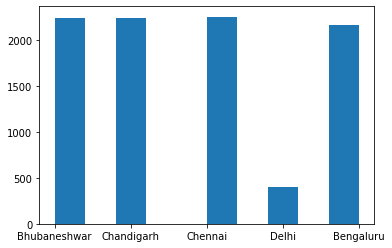

In [264]:
plt.hist(df_no_missing['Region'])

(array([4721.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4573.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

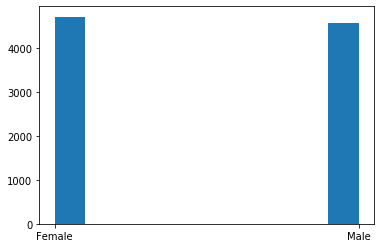

In [265]:
 plt.hist(df_no_missing['Gender'])

(array([4721.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4573.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

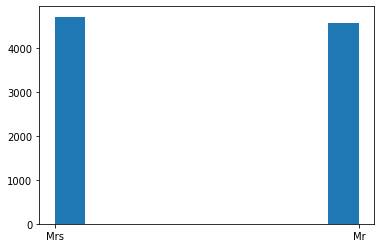

In [266]:
plt.hist(df_no_missing['Designation'])

(array([8419.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         875.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

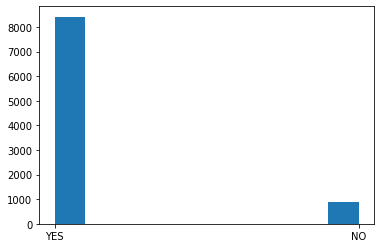

In [267]:
plt.hist(df_no_missing['Married'])

[1. 2. 0.]


(array([2998.,    0.,    0.,    0.,    0., 2968.,    0.,    0.,    0.,
        3328.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

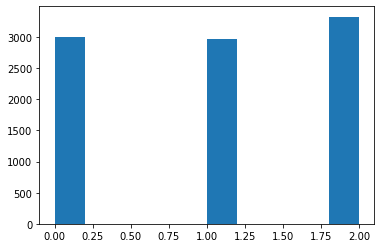

In [268]:
print(df_no_missing['Children'].unique())
plt.hist(df_no_missing['Children'])

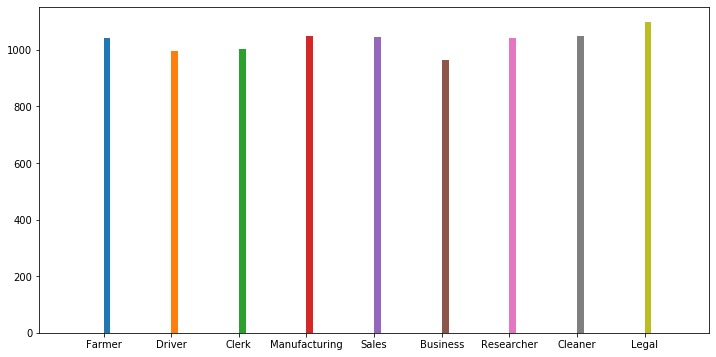

In [269]:
plt.figure(figsize=(12,6))
for i in df_no_missing['Occupation'].unique():
    plt.hist(df_no_missing[df_no_missing['Occupation']==i]['Occupation'])

In [270]:
df_no_missing['Occupation'].unique()

array(['Farmer', 'Driver', 'Clerk', 'Manufacturing', 'Sales', 'Business',
       'Researcher', 'Cleaner', 'Legal'], dtype=object)

In [271]:
df_no_missing['Mode_transport'].unique()

array(['Public', 'Walk', 'Car'], dtype=object)

In [272]:
df_no_missing['comorbidity'].unique()

array(['Hypertension', 'Diabetes', 'Coronary Heart Disease', 'None'],
      dtype=object)

In [273]:
df_no_missing['Pulmonary score'].unique()

array(['<400', '<100', '<200', '<300'], dtype=object)

In [274]:
df_no_missing['cardiological pressure'].unique()

array(['Normal', 'Stage-02', 'Stage-01', 'Elevated'], dtype=object)

In [275]:
df_no_missing.loc[df_no_missing['Mode_transport']=='Public', 'Mode_transport'] = 3
df_no_missing.loc[df_no_missing['Mode_transport']=='Car', 'Mode_transport'] = 1
df_no_missing.loc[df_no_missing['Mode_transport']=='Walk', 'Mode_transport'] = 2

In [276]:
df_no_missing.loc[df_no_missing['comorbidity']=='Diabetes', 'comorbidity'] = 4
df_no_missing.loc[df_no_missing['comorbidity']=='Coronary Heart Disease', 'comorbidity'] = 3
df_no_missing.loc[df_no_missing['comorbidity']=='Hypertension', 'comorbidity'] = 2
df_no_missing.loc[df_no_missing['comorbidity']=='None', 'comorbidity'] = 1

In [277]:
df_no_missing.loc[df_no_missing['Pulmonary score']=='<400', 'Pulmonary score'] = 4
df_no_missing.loc[df_no_missing['Pulmonary score']=='<300', 'Pulmonary score'] = 3
df_no_missing.loc[df_no_missing['Pulmonary score']=='<200', 'Pulmonary score'] = 2
df_no_missing.loc[df_no_missing['Pulmonary score']=='<100', 'Pulmonary score'] = 1

In [278]:
df_no_missing.loc[df_no_missing['cardiological pressure']=='Normal', 'cardiological pressure'] = 1
df_no_missing.loc[df_no_missing['cardiological pressure']=='Elevated', 'cardiological pressure'] = 2
df_no_missing.loc[df_no_missing['cardiological pressure']=='Stage-01', 'cardiological pressure'] = 3
df_no_missing.loc[df_no_missing['cardiological pressure']=='Stage-02', 'cardiological pressure'] = 4

In [279]:
df_no_missing.loc[df_no_missing['Occupation']=='Farmer', 'Occupation'] = 5
df_no_missing.loc[df_no_missing['Occupation']=='Cleaner', 'Occupation'] = 9
df_no_missing.loc[df_no_missing['Occupation']=='Driver', 'Occupation'] = 8
df_no_missing.loc[df_no_missing['Occupation']=='Manufacturing', 'Occupation'] = 6
df_no_missing.loc[df_no_missing['Occupation']=='Clerk', 'Occupation'] = 2
df_no_missing.loc[df_no_missing['Occupation']=='Business', 'Occupation'] = 3
df_no_missing.loc[df_no_missing['Occupation']=='Sales', 'Occupation'] = 7
df_no_missing.loc[df_no_missing['Occupation']=='Researcher', 'Occupation'] = 4
df_no_missing.loc[df_no_missing['Occupation']=='Legal', 'Occupation'] = 1

In [280]:
df_no_missing

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob,class
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,5,3,2,...,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010,0
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,5,2,2,...,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880,1
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,8,1,2,...,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225,0
5,6,Bhubaneshwar,Female,Mrs,sandhya,YES,1.0,2,3,2,...,216.0,94.0,38.0,5,5,4600000.0,1900000,2.0,49.518345,0
6,7,Bhubaneshwar,Female,Mrs,iqra,YES,2.0,6,1,2,...,311.0,99.0,68.0,23,5,4000000.0,1600000,1.0,49.670361,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,22690,Bengaluru,Male,Mr,manoj kumar,YES,1.0,5,3,8,...,337.0,69.0,44.0,31,3,3300000.0,1400000,2.0,53.741750,1
10709,22691,Bengaluru,Male,Mr,ashish,NO,2.0,3,1,8,...,209.0,61.0,56.0,35,7,4000000.0,300000,0.0,41.981760,0
10710,22692,Bengaluru,Male,Mr,mohd mujahid ansari,YES,0.0,6,1,8,...,211.0,65.0,47.0,35,7,1500000.0,700000,0.0,47.148663,0
10711,22693,Bengaluru,Male,Mr,munnakumar,YES,0.0,2,3,8,...,296.0,87.0,37.0,16,5,3000000.0,2100000,2.0,47.708533,0


In [281]:
cities=df_no_missing['Region'].unique()
print(cities)
def label_city(x):
    if x == 'Bhubaneshwar':
        return 1
    elif x =='Chandigarh':
        return 2
    elif x =='Chennai':
        return 3
    elif x =='delhi':
        return 4
    else:
        return 5
def label_gender(x):
    if x =='Female':
        return 1
    else:
        return 0
def label_married(x):
    if x =='YES':
        return 1
    else:
        return 0

df_no_missing['Region']=df_no_missing['Region'].apply(label_city)
df_no_missing['Gender']=df_no_missing['Gender'].apply(label_gender)
df_no_missing['Married']=df_no_missing['Married'].apply(label_married)
df_no_missing

['Bhubaneshwar' 'Chandigarh' 'Chennai' 'Delhi' 'Bengaluru']


,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob,class
0,1,1,1,Mrs,mansi,1,1.0,5,3,2,...,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010,0
1,2,1,1,Mrs,riya masi,1,2.0,5,2,2,...,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880,1
3,4,1,1,Mrs,anjali @ babli,1,1.0,8,1,2,...,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225,0
5,6,1,1,Mrs,sandhya,1,1.0,2,3,2,...,216.0,94.0,38.0,5,5,4600000.0,1900000,2.0,49.518345,0
6,7,1,1,Mrs,iqra,1,2.0,6,1,2,...,311.0,99.0,68.0,23,5,4000000.0,1600000,1.0,49.670361,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,22690,5,0,Mr,manoj kumar,1,1.0,5,3,8,...,337.0,69.0,44.0,31,3,3300000.0,1400000,2.0,53.741750,1
10709,22691,5,0,Mr,ashish,0,2.0,3,1,8,...,209.0,61.0,56.0,35,7,4000000.0,300000,0.0,41.981760,0
10710,22692,5,0,Mr,mohd mujahid ansari,1,0.0,6,1,8,...,211.0,65.0,47.0,35,7,1500000.0,700000,0.0,47.148663,0
10711,22693,5,0,Mr,munnakumar,1,0.0,2,3,8,...,296.0,87.0,37.0,16,5,3000000.0,2100000,2.0,47.708533,0


In [282]:
cols_to_remove = ['people_ID','Name','Designation','Infect_Prob'] 
df_no_missing = df_no_missing.drop(cols_to_remove, axis=1) 
df_no_missing.columns

Index(['Region', 'Gender', 'Married', 'Children', 'Occupation',
       'Mode_transport', 'cases/1M', 'Deaths/1M', 'comorbidity', 'Age',
       'Coma score', 'Pulmonary score', 'cardiological pressure', 'Diuresis',
       'Platelets', 'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol',
       'Charlson Index', 'Blood Glucose', 'Insurance', 'salary', 'FT/month',
       'class'],
      dtype='object')

In [283]:
df_no_missing

,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,class
0,1,1,1,1.0,5,3,2,0,2,68,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,0
1,1,1,1,2.0,5,2,2,0,4,64,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,1
3,1,1,1,1.0,8,1,2,0,3,33,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,0
5,1,1,1,1.0,2,3,2,0,1,35,...,86.0,216.0,94.0,38.0,5,5,4600000.0,1900000,2.0,0
6,1,1,1,2.0,6,1,2,0,3,61,...,156.0,311.0,99.0,68.0,23,5,4000000.0,1600000,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,5,0,1,1.0,5,3,8,2,4,35,...,150.0,337.0,69.0,44.0,31,3,3300000.0,1400000,2.0,1
10709,5,0,0,2.0,3,1,8,2,4,20,...,24.0,209.0,61.0,56.0,35,7,4000000.0,300000,0.0,0
10710,5,0,1,0.0,6,1,8,2,1,42,...,134.0,211.0,65.0,47.0,35,7,1500000.0,700000,0.0,0
10711,5,0,1,0.0,2,3,8,2,4,59,...,151.0,296.0,87.0,37.0,16,5,3000000.0,2100000,2.0,0


In [284]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaled_df_no_missing = scaler.fit_transform(df_no_missing)

In [285]:
col=df_no_missing.columns
for i in range(0,len(col)-1):
    df_no_missing[col[i]]=scaled_df_no_missing[:,i]
df_no_missing

,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,class
0,0.0,1.0,1.0,0.5,0.500,1.0,0.142857,0.0,0.333333,1.000000,...,0.384211,0.220000,0.64,0.657143,0.675,1.00,0.702128,0.50,1.0,0
1,0.0,1.0,1.0,1.0,0.500,0.5,0.142857,0.0,1.000000,0.923077,...,0.189474,0.853333,0.78,0.942857,0.125,0.75,0.276596,0.05,0.5,1
3,0.0,1.0,1.0,0.5,0.875,0.0,0.142857,0.0,0.666667,0.326923,...,0.773684,0.500000,0.28,0.714286,0.675,1.00,0.085106,1.00,0.5,0
5,0.0,1.0,1.0,0.5,0.125,1.0,0.142857,0.0,0.000000,0.365385,...,0.347368,0.106667,0.88,0.085714,0.125,0.50,0.914894,0.80,1.0,0
6,0.0,1.0,1.0,1.0,0.625,0.0,0.142857,0.0,0.666667,0.865385,...,0.715789,0.740000,0.98,0.942857,0.575,0.50,0.787234,0.65,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,1.0,0.0,1.0,0.5,0.500,1.0,1.000000,1.0,1.000000,0.365385,...,0.684211,0.913333,0.38,0.257143,0.775,0.00,0.638298,0.55,1.0,1
10709,1.0,0.0,0.0,1.0,0.250,0.0,1.000000,1.0,1.000000,0.076923,...,0.021053,0.060000,0.22,0.600000,0.875,1.00,0.787234,0.00,0.0,0
10710,1.0,0.0,1.0,0.0,0.625,0.0,1.000000,1.0,0.000000,0.500000,...,0.600000,0.073333,0.30,0.342857,0.875,1.00,0.255319,0.20,0.0,0
10711,1.0,0.0,1.0,0.0,0.125,1.0,1.000000,1.0,1.000000,0.826923,...,0.689474,0.640000,0.74,0.057143,0.400,0.50,0.574468,0.90,1.0,0


In [286]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df_no_missing.iloc[:,:-1]  
y = df_no_missing.iloc[:,24]   
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(20,'Score')) 

                     Specs        Score
7                Deaths/1M  1150.317771
3                 Children   812.617356
6                 cases/1M   734.846926
0                   Region   395.049364
14               Platelets    25.707866
10              Coma score    25.419276
15                     HBB    21.479579
23                FT/month     6.406579
11         Pulmonary score     4.980126
12  cardiological pressure     4.416330
2                  Married     3.168161
13                Diuresis     0.593207
9                      Age     0.515881
5           Mode_transport     0.270095
1                   Gender     0.215119
22                  salary     0.167767
19          Charlson Index     0.120276
20           Blood Glucose     0.116658
18         HDL cholesterol     0.107258
8              comorbidity     0.040966


In [287]:
independent= df_no_missing.iloc[:,:-1].values
dependent = df_no_missing.iloc[:,24].values
independent[0]

array([0.        , 1.        , 1.        , 0.5       , 0.5       ,
       1.        , 0.14285714, 0.        , 0.33333333, 1.        ,
       0.41666667, 1.        , 0.        , 0.97352941, 0.95862069,
       0.38421053, 0.22      , 0.64      , 0.65714286, 0.675     ,
       1.        , 0.70212766, 0.5       , 1.        ])

In [288]:
from sklearn.model_selection import train_test_split
independent, test_x, dependent, test_y = train_test_split(independent, dependent, test_size=0.25, random_state=0)

In [289]:
from sklearn.naive_bayes import GaussianNB
gausian_model = GaussianNB()
gausian_model.fit(independent,dependent)

GaussianNB(priors=None, var_smoothing=1e-09)

In [290]:
y_predict=gausian_model.predict(test_x) 

In [291]:
predict_prob = gausian_model.predict_proba(test_x)

In [292]:
predict_prob

array([[9.08883402e-01, 9.11165984e-02],
       [8.37963452e-01, 1.62036548e-01],
       [9.97876031e-01, 2.12396854e-03],
       ...,
       [4.29035553e-01, 5.70964447e-01],
       [9.99582346e-01, 4.17654070e-04],
       [9.99468065e-01, 5.31935497e-04]])

In [293]:
from sklearn import metrics
cm = metrics.confusion_matrix(test_y,y_predict) 
print(cm)
accuracy = metrics.accuracy_score(test_y, y_predict) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(test_y, y_predict) 
print("Precision score:",precision)
recall = metrics.recall_score(test_y, y_predict) 
print("Recall score:",recall)

[[1369  196]
 [ 285  474]]
Accuracy score: 0.7930292598967298
Precision score: 0.7074626865671642
Recall score: 0.6245059288537549


In [294]:
y_predict

array([0, 0, 0, ..., 1, 0, 0])

In [295]:
test_y

array([0, 1, 0, ..., 0, 0, 0])

In [296]:
test_x.shape

(2324, 24)

In [297]:
sq_dif=(test_x[:,23]-predict_prob[:,1])**2
sum_sq_dif=np.sum(sq_dif)
sqrt_sum_sq_dif=np.sqrt(sum_sq_dif)
sqrt_sum_sq_dif

28.0339294507257

In [298]:
test_to_predict=pd.read_excel('Test_dataset.xlsx')

In [299]:
test_to_predict

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,Delhi,Female,Mrs,smt rekha prajapat,YES,2,Driver,Public,4,...,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,Delhi,Male,Mr,nirmal,YES,2,Legal,Walk,4,...,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,Delhi,Female,Mrs,pinky,YES,2,Sales,Car,4,...,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,Delhi,Female,Mrs,pooja @aafrin,YES,2,Sales,Car,4,...,78,83,211,87,52,13,6,3100000,600000,2
4,5099,Delhi,Female,Mrs,anjali,YES,2,Business,Car,4,...,109,207,312,94,68,39,5,2300000,1500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14493,23737,Thiruvananthapuram,Male,Mr,hanuman sing,YES,0,Cleaner,Walk,11,...,16,36,346,66,45,34,3,4200000,800000,2
14494,11171,Thiruvananthapuram,Female,Mrs,gurupreet kaur @ nainsi,YES,0,Clerk,Car,11,...,22,29,278,94,37,23,6,4500000,1800000,2
14495,23243,Thiruvananthapuram,Male,Mr,sonu pandey,YES,0,Business,Public,11,...,15,28,294,73,56,6,6,4300000,800000,1
14496,11199,Thiruvananthapuram,Female,Mrs,nikky,YES,0,Driver,Car,11,...,31,24,227,83,60,32,7,2400000,1800000,2


In [300]:
test_to_predict['Region'].unique()

array(['Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune',
       'Thiruvananthapuram'], dtype=object)

In [301]:
data['Region'].unique()

array([1, 2, 3, 5])

In [302]:
test_to_predict.isnull().sum().sort_values(ascending=False)

Name                      32
FT/month                   0
Age                        0
Region                     0
Gender                     0
Designation                0
Married                    0
Children                   0
Occupation                 0
Mode_transport             0
cases/1M                   0
Deaths/1M                  0
comorbidity                0
Coma score                 0
salary                     0
Pulmonary score            0
cardiological pressure     0
Diuresis                   0
Platelets                  0
HBB                        0
d-dimer                    0
Heart rate                 0
HDL cholesterol            0
Charlson Index             0
Blood Glucose              0
Insurance                  0
people_ID                  0
dtype: int64

In [303]:
test_to_predict['Occupation'].unique()

array(['Driver', 'Legal', 'Sales', 'Business', 'Manufacturing',
       'Researcher', 'Clerk', 'Cleaner', 'Farmer'], dtype=object)

['<200' '<100' '<300' '<400']


(array([3691.,    0.,    0., 3545.,    0.,    0., 3602.,    0.,    0.,
        3660.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

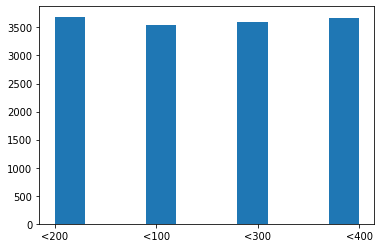

In [304]:
#plt.figure(figsize=(12,6))
print(test_to_predict['Pulmonary score'].unique())
plt.hist(test_to_predict['Pulmonary score'])

In [305]:
test_to_predict.loc[test_to_predict['Occupation']=='Farmer', 'Occupation'] = 5
test_to_predict.loc[test_to_predict['Occupation']=='Cleaner', 'Occupation'] = 9
test_to_predict.loc[test_to_predict['Occupation']=='Driver', 'Occupation'] = 8
test_to_predict.loc[test_to_predict['Occupation']=='Manufacturing', 'Occupation'] = 6
test_to_predict.loc[test_to_predict['Occupation']=='Clerk', 'Occupation'] = 2
test_to_predict.loc[test_to_predict['Occupation']=='Business', 'Occupation'] = 3
test_to_predict.loc[test_to_predict['Occupation']=='Sales', 'Occupation'] = 7
test_to_predict.loc[test_to_predict['Occupation']=='Researcher', 'Occupation'] = 4
test_to_predict.loc[test_to_predict['Occupation']=='Legal', 'Occupation'] = 1

In [306]:
def label_city_test_data(x):
    if x =='Hyderabad':
        return 6
    elif x =='Kolkata':
        return 8
    elif x =='Delhi':
        return 4
    elif x =='Thiruvananthapuram':
        return 7
    elif x =='Pune':
        return 10
    elif x =='Mumbai':
        return 9

test_to_predict['Region']=test_to_predict['Region'].apply(label_city_test_data)
test_to_predict['Gender']=test_to_predict['Gender'].apply(label_gender)
test_to_predict['Married']=test_to_predict['Married'].apply(label_married)

In [307]:
test_to_predict['Mode_transport'].unique()

array(['Public', 'Walk', 'Car'], dtype=object)

In [308]:
test_to_predict['comorbidity'].unique()

array(['Diabetes', 'None', 'Hypertension', 'Coronary Heart Disease'],
      dtype=object)

In [309]:
test_to_predict['Pulmonary score'].unique()

array(['<200', '<100', '<300', '<400'], dtype=object)

In [310]:
test_to_predict['cardiological pressure'].unique()

array(['Stage-01', 'Stage-02', 'Elevated', 'Normal'], dtype=object)

In [311]:
test_to_predict.loc[test_to_predict['Mode_transport']=='Public', 'Mode_transport'] = 3
test_to_predict.loc[test_to_predict['Mode_transport']=='Car', 'Mode_transport'] = 1
test_to_predict.loc[test_to_predict['Mode_transport']=='Walk', 'Mode_transport'] = 2

In [312]:
test_to_predict.loc[test_to_predict['comorbidity']=='Diabetes', 'comorbidity'] = 4
test_to_predict.loc[test_to_predict['comorbidity']=='Coronary Heart Disease', 'comorbidity'] = 3
test_to_predict.loc[test_to_predict['comorbidity']=='Hypertension', 'comorbidity'] = 2
test_to_predict.loc[test_to_predict['comorbidity']=='None', 'comorbidity'] = 1

In [313]:
test_to_predict.loc[test_to_predict['Pulmonary score']=='<400', 'Pulmonary score'] = 4
test_to_predict.loc[test_to_predict['Pulmonary score']=='<300', 'Pulmonary score'] = 3
test_to_predict.loc[test_to_predict['Pulmonary score']=='<200', 'Pulmonary score'] = 2
test_to_predict.loc[test_to_predict['Pulmonary score']=='<100', 'Pulmonary score'] = 1

In [314]:
test_to_predict.loc[test_to_predict['cardiological pressure']=='Normal', 'cardiological pressure'] = 1
test_to_predict.loc[test_to_predict['cardiological pressure']=='Elevated', 'cardiological pressure'] = 2
test_to_predict.loc[test_to_predict['cardiological pressure']=='Stage-01', 'cardiological pressure'] = 3
test_to_predict.loc[test_to_predict['cardiological pressure']=='Stage-02', 'cardiological pressure'] = 4

In [315]:
test_to_predict.loc[test_to_predict['Occupation']=='Farmer', 'Occupation'] = 5
test_to_predict.loc[test_to_predict['Occupation']=='Cleaner', 'Occupation'] = 9
test_to_predict.loc[test_to_predict['Occupation']=='Driver', 'Occupation'] = 8
test_to_predict.loc[test_to_predict['Occupation']=='Manufacturing', 'Occupation'] = 6
test_to_predict.loc[test_to_predict['Occupation']=='Clerk', 'Occupation'] = 2
test_to_predict.loc[test_to_predict['Occupation']=='Business', 'Occupation'] = 3
test_to_predict.loc[test_to_predict['Occupation']=='Sales', 'Occupation'] = 7
test_to_predict.loc[test_to_predict['Occupation']=='Researcher', 'Occupation'] = 4
test_to_predict.loc[test_to_predict['Occupation']=='Legal', 'Occupation'] = 1

/home/siddharth/ENTER/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [316]:
test_to_predict

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,4,1,Mrs,smt rekha prajapat,1,2,8,3,4,...,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,4,0,Mr,nirmal,1,2,1,2,4,...,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,4,1,Mrs,pinky,1,2,7,1,4,...,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,4,1,Mrs,pooja @aafrin,1,2,7,1,4,...,78,83,211,87,52,13,6,3100000,600000,2
4,5099,4,1,Mrs,anjali,1,2,3,1,4,...,109,207,312,94,68,39,5,2300000,1500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14493,23737,7,0,Mr,hanuman sing,1,0,9,2,11,...,16,36,346,66,45,34,3,4200000,800000,2
14494,11171,7,1,Mrs,gurupreet kaur @ nainsi,1,0,2,1,11,...,22,29,278,94,37,23,6,4500000,1800000,2
14495,23243,7,0,Mr,sonu pandey,1,0,3,3,11,...,15,28,294,73,56,6,6,4300000,800000,1
14496,11199,7,1,Mrs,nikky,1,0,8,1,11,...,31,24,227,83,60,32,7,2400000,1800000,2


In [317]:
test_to_predict.isnull().sum().sort_values(ascending=False)

Name                      32
FT/month                   0
Age                        0
Region                     0
Gender                     0
Designation                0
Married                    0
Children                   0
Occupation                 0
Mode_transport             0
cases/1M                   0
Deaths/1M                  0
comorbidity                0
Coma score                 0
salary                     0
Pulmonary score            0
cardiological pressure     0
Diuresis                   0
Platelets                  0
HBB                        0
d-dimer                    0
Heart rate                 0
HDL cholesterol            0
Charlson Index             0
Blood Glucose              0
Insurance                  0
people_ID                  0
dtype: int64

In [318]:
test_to_predict = test_to_predict.dropna(axis=0)
test_to_predict

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,4,1,Mrs,smt rekha prajapat,1,2,8,3,4,...,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,4,0,Mr,nirmal,1,2,1,2,4,...,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,4,1,Mrs,pinky,1,2,7,1,4,...,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,4,1,Mrs,pooja @aafrin,1,2,7,1,4,...,78,83,211,87,52,13,6,3100000,600000,2
4,5099,4,1,Mrs,anjali,1,2,3,1,4,...,109,207,312,94,68,39,5,2300000,1500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14493,23737,7,0,Mr,hanuman sing,1,0,9,2,11,...,16,36,346,66,45,34,3,4200000,800000,2
14494,11171,7,1,Mrs,gurupreet kaur @ nainsi,1,0,2,1,11,...,22,29,278,94,37,23,6,4500000,1800000,2
14495,23243,7,0,Mr,sonu pandey,1,0,3,3,11,...,15,28,294,73,56,6,6,4300000,800000,1
14496,11199,7,1,Mrs,nikky,1,0,8,1,11,...,31,24,227,83,60,32,7,2400000,1800000,2


In [319]:
cols_to_remove = ['people_ID','Name','Designation'] 
test_to_predict = test_to_predict.drop(cols_to_remove, axis=1) 
test_to_predict.columns

Index(['Region', 'Gender', 'Married', 'Children', 'Occupation',
       'Mode_transport', 'cases/1M', 'Deaths/1M', 'comorbidity', 'Age',
       'Coma score', 'Pulmonary score', 'cardiological pressure', 'Diuresis',
       'Platelets', 'HBB', 'd-dimer', 'Heart rate', 'HDL cholesterol',
       'Charlson Index', 'Blood Glucose', 'Insurance', 'salary', 'FT/month'],
      dtype='object')

In [320]:
test_to_predict

,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,4,1,1,2,8,3,4,1,4,52,...,153,196,240,85,53,17,3,3900000,1300000,1
1,4,0,1,2,1,2,4,1,4,53,...,95,138,241,81,61,2,5,1800000,1300000,1
2,4,1,1,2,7,1,4,1,4,35,...,40,166,236,88,47,24,3,5000000,2000000,2
3,4,1,1,2,7,1,4,1,1,31,...,78,83,211,87,52,13,6,3100000,600000,2
4,4,1,1,2,3,1,4,1,4,51,...,109,207,312,94,68,39,5,2300000,1500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14493,7,0,1,0,9,2,11,2,3,55,...,16,36,346,66,45,34,3,4200000,800000,2
14494,7,1,1,0,2,1,11,2,1,44,...,22,29,278,94,37,23,6,4500000,1800000,2
14495,7,0,1,0,3,3,11,2,1,46,...,15,28,294,73,56,6,6,4300000,800000,1
14496,7,1,1,0,8,1,11,2,3,34,...,31,24,227,83,60,32,7,2400000,1800000,2


In [321]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaled_test_to_predict = scaler.fit_transform(test_to_predict)

In [322]:
col=test_to_predict.columns
for i in range(0,len(col)):
    test_to_predict[col[i]]=scaled_test_to_predict[:,i]
test_to_predict

,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,0.0,1.0,1.0,1.0,0.875,1.0,0.307692,0.333333,1.000000,0.692308,...,0.951724,0.926316,0.266667,0.70,0.514286,0.425,0.00,0.765957,0.50,0.5
1,0.0,0.0,1.0,1.0,0.000,0.5,0.307692,0.333333,1.000000,0.711538,...,0.551724,0.621053,0.273333,0.62,0.742857,0.050,0.50,0.319149,0.50,0.5
2,0.0,1.0,1.0,1.0,0.750,0.0,0.307692,0.333333,1.000000,0.365385,...,0.172414,0.768421,0.240000,0.76,0.342857,0.600,0.00,1.000000,0.85,1.0
3,0.0,1.0,1.0,1.0,0.750,0.0,0.307692,0.333333,0.000000,0.288462,...,0.434483,0.331579,0.073333,0.74,0.485714,0.325,0.75,0.595745,0.15,1.0
4,0.0,1.0,1.0,1.0,0.250,0.0,0.307692,0.333333,1.000000,0.673077,...,0.648276,0.984211,0.746667,0.88,0.942857,0.975,0.50,0.425532,0.60,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14493,0.5,0.0,1.0,0.0,1.000,0.5,0.846154,0.666667,0.666667,0.750000,...,0.006897,0.084211,0.973333,0.32,0.285714,0.850,0.00,0.829787,0.25,1.0
14494,0.5,1.0,1.0,0.0,0.125,0.0,0.846154,0.666667,0.000000,0.538462,...,0.048276,0.047368,0.520000,0.88,0.057143,0.575,0.75,0.893617,0.75,1.0
14495,0.5,0.0,1.0,0.0,0.250,1.0,0.846154,0.666667,0.000000,0.576923,...,0.000000,0.042105,0.626667,0.46,0.600000,0.150,0.75,0.851064,0.25,0.5
14496,0.5,1.0,1.0,0.0,0.875,0.0,0.846154,0.666667,0.666667,0.346154,...,0.110345,0.021053,0.180000,0.66,0.714286,0.800,1.00,0.446809,0.75,1.0


In [323]:
#selected_col=['Deaths/1M','cases/1M','Children','Region','Married','Age','Platelets','Coma score','salary','HBB']
#test_to_predict=test_to_predict[selected_col]
predict_prob = gausian_model.predict_proba(test_to_predict)

In [324]:
test_to_predict['Infect_Prob']=predict_prob[:,1]

In [325]:
test_to_predict

,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,0.0,1.0,1.0,1.0,0.875,1.0,0.307692,0.333333,1.000000,0.692308,...,0.926316,0.266667,0.70,0.514286,0.425,0.00,0.765957,0.50,0.5,0.332045
1,0.0,0.0,1.0,1.0,0.000,0.5,0.307692,0.333333,1.000000,0.711538,...,0.621053,0.273333,0.62,0.742857,0.050,0.50,0.319149,0.50,0.5,0.365150
2,0.0,1.0,1.0,1.0,0.750,0.0,0.307692,0.333333,1.000000,0.365385,...,0.768421,0.240000,0.76,0.342857,0.600,0.00,1.000000,0.85,1.0,0.352987
3,0.0,1.0,1.0,1.0,0.750,0.0,0.307692,0.333333,0.000000,0.288462,...,0.331579,0.073333,0.74,0.485714,0.325,0.75,0.595745,0.15,1.0,0.253798
4,0.0,1.0,1.0,1.0,0.250,0.0,0.307692,0.333333,1.000000,0.673077,...,0.984211,0.746667,0.88,0.942857,0.975,0.50,0.425532,0.60,0.5,0.315346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14493,0.5,0.0,1.0,0.0,1.000,0.5,0.846154,0.666667,0.666667,0.750000,...,0.084211,0.973333,0.32,0.285714,0.850,0.00,0.829787,0.25,1.0,0.015459
14494,0.5,1.0,1.0,0.0,0.125,0.0,0.846154,0.666667,0.000000,0.538462,...,0.047368,0.520000,0.88,0.057143,0.575,0.75,0.893617,0.75,1.0,0.011079
14495,0.5,0.0,1.0,0.0,0.250,1.0,0.846154,0.666667,0.000000,0.576923,...,0.042105,0.626667,0.46,0.600000,0.150,0.75,0.851064,0.25,0.5,0.012950
14496,0.5,1.0,1.0,0.0,0.875,0.0,0.846154,0.666667,0.666667,0.346154,...,0.021053,0.180000,0.66,0.714286,0.800,1.00,0.446809,0.75,1.0,0.015442


(array([5354., 1023., 1042.,  905.,  645.,  636.,  683.,  811.,  645.,
        2722.]),
 array([3.47134430e-04, 1.00302470e-01, 2.00257806e-01, 3.00213141e-01,
        4.00168477e-01, 5.00123813e-01, 6.00079148e-01, 7.00034484e-01,
        7.99989820e-01, 8.99945155e-01, 9.99900491e-01]),
 <a list of 10 Patch objects>)

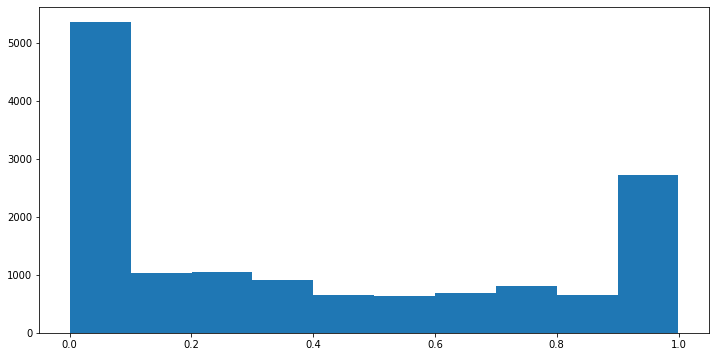

In [326]:
plt.figure(figsize=(12,6))
plt.hist(test_to_predict['Infect_Prob'])

In [327]:
featureScores.nlargest(20,'Score')

,Specs,Score
7,Deaths/1M,1150.317771
3,Children,812.617356
6,cases/1M,734.846926
0,Region,395.049364
14,Platelets,25.707866
10,Coma score,25.419276
15,HBB,21.479579
23,FT/month,6.406579
11,Pulmonary score,4.980126
12,cardiological pressure,4.416330


In [328]:
selected_col=['Deaths/1M','Children','cases/1M','HDL cholesterol','salary','Gender','Platelets','Coma score','Charlson Index','HBB','FT/month','Age','Mode_transport','Pulmonary score','cardiological pressure','Married','Diuresis','class']
df_no_missing=df_no_missing[selected_col]

independent= df_no_missing.iloc[:,:-1].values
dependent = df_no_missing.iloc[:,17].values

from sklearn.model_selection import train_test_split
independent, test_x, dependent, test_y = train_test_split(independent, dependent, test_size=0.25, random_state=0)

from sklearn.naive_bayes import GaussianNB
gausian_model_select = GaussianNB()
gausian_model_select.fit(independent,dependent)
y_predict=gausian_model_select.predict(test_x) 
predict_prob = gausian_model_select.predict_proba(test_x)
cm = metrics.confusion_matrix(test_y,y_predict) 
print(cm)
accuracy = metrics.accuracy_score(test_y, y_predict) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(test_y, y_predict) 
print("Precision score:",precision)
recall = metrics.recall_score(test_y, y_predict) 
print("Recall score:",recall)

[[1478   87]
 [ 261  498]]
Accuracy score: 0.8502581755593803
Precision score: 0.8512820512820513
Recall score: 0.6561264822134387


In [329]:
selected_col=['Deaths/1M','Children','cases/1M','HDL cholesterol','salary','Gender','Platelets','Coma score','Charlson Index','HBB','FT/month','Age','Mode_transport','Pulmonary score','cardiological pressure','Married','Diuresis']
test_to_predict=test_to_predict[selected_col]
predict_prob = gausian_model_select.predict_proba(test_to_predict)

In [330]:
test_to_predict['Infect_Prob']=predict_prob[:,1]*100

/home/siddharth/ENTER/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [331]:
test_to_predict

,Deaths/1M,Children,cases/1M,HDL cholesterol,salary,Gender,Platelets,Coma score,Charlson Index,HBB,FT/month,Age,Mode_transport,Pulmonary score,cardiological pressure,Married,Diuresis,Infect_Prob
0,0.333333,1.0,0.307692,0.514286,0.50,1.0,0.951724,0.000000,0.425,0.926316,0.5,0.692308,1.0,0.333333,0.666667,1.0,0.817647,53.410476
1,0.333333,1.0,0.307692,0.742857,0.50,0.0,0.551724,0.666667,0.050,0.621053,0.5,0.711538,0.5,0.333333,0.666667,1.0,0.879412,57.416923
2,0.333333,1.0,0.307692,0.342857,0.85,1.0,0.172414,0.500000,0.600,0.768421,1.0,0.365385,0.0,0.000000,1.000000,1.0,0.970588,56.033582
3,0.333333,1.0,0.307692,0.485714,0.15,1.0,0.434483,0.750000,0.325,0.331579,1.0,0.288462,0.0,0.666667,0.333333,1.0,0.282353,46.550569
4,0.333333,1.0,0.307692,0.942857,0.60,1.0,0.648276,0.250000,0.975,0.984211,0.5,0.673077,0.0,0.333333,0.666667,1.0,0.350000,52.287365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14493,0.666667,0.0,0.846154,0.285714,0.25,0.0,0.006897,0.166667,0.850,0.084211,1.0,0.750000,0.5,1.000000,0.000000,1.0,0.902941,1.849887
14494,0.666667,0.0,0.846154,0.057143,0.75,1.0,0.048276,0.083333,0.575,0.047368,1.0,0.538462,0.0,0.666667,0.333333,1.0,0.261765,1.383254
14495,0.666667,0.0,0.846154,0.600000,0.25,0.0,0.000000,0.250000,0.150,0.042105,0.5,0.576923,1.0,0.666667,0.333333,1.0,0.150000,1.632592
14496,0.666667,0.0,0.846154,0.714286,0.75,1.0,0.110345,0.166667,0.800,0.021053,1.0,0.346154,0.0,0.333333,0.666667,1.0,0.188235,2.071758


(array([3352.,  940.,  750.,  671.,  479.,  400.,  336.,  309.,  302.,
         315.,  327.,  360.,  356.,  357.,  288.,  256.,  234.,  208.,
         179.,  195.,  155.,  164.,  173.,  162.,  183.,  185.,  211.,
         326.,  686., 1607.]),
 array([2.85372823e-02, 3.36018078e+00, 6.69182429e+00, 1.00234678e+01,
        1.33551113e+01, 1.66867548e+01, 2.00183983e+01, 2.33500418e+01,
        2.66816853e+01, 3.00133288e+01, 3.33449723e+01, 3.66766158e+01,
        4.00082593e+01, 4.33399028e+01, 4.66715463e+01, 5.00031898e+01,
        5.33348333e+01, 5.66664768e+01, 5.99981203e+01, 6.33297638e+01,
        6.66614073e+01, 6.99930508e+01, 7.33246943e+01, 7.66563378e+01,
        7.99879813e+01, 8.33196248e+01, 8.66512683e+01, 8.99829118e+01,
        9.33145554e+01, 9.66461989e+01, 9.99778424e+01]),
 <a list of 30 Patch objects>)

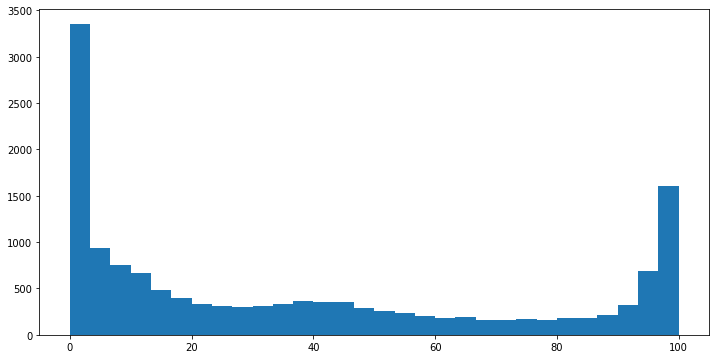

In [332]:
plt.figure(figsize=(12,6))
plt.hist(test_to_predict['Infect_Prob'],30)

(array([1607.,  686.,  326.,  211.,  185.,  183.,  162.,  173.,  164.,
         155.,  195.,  179.,  208.,  234.,  256.,  288.,  357.,  356.,
         360.,  327.,  315.,  302.,  309.,  336.,  400.,  479.,  671.,
         750.,  940., 3352.]),
 array([2.21576446e-02, 3.35380115e+00, 6.68544465e+00, 1.00170882e+01,
        1.33487317e+01, 1.66803752e+01, 2.00120187e+01, 2.33436622e+01,
        2.66753057e+01, 3.00069492e+01, 3.33385927e+01, 3.66702362e+01,
        4.00018797e+01, 4.33335232e+01, 4.66651667e+01, 4.99968102e+01,
        5.33284537e+01, 5.66600972e+01, 5.99917407e+01, 6.33233842e+01,
        6.66550277e+01, 6.99866712e+01, 7.33183147e+01, 7.66499582e+01,
        7.99816017e+01, 8.33132452e+01, 8.66448887e+01, 8.99765322e+01,
        9.33081757e+01, 9.66398192e+01, 9.99714627e+01]),
 <a list of 30 Patch objects>)

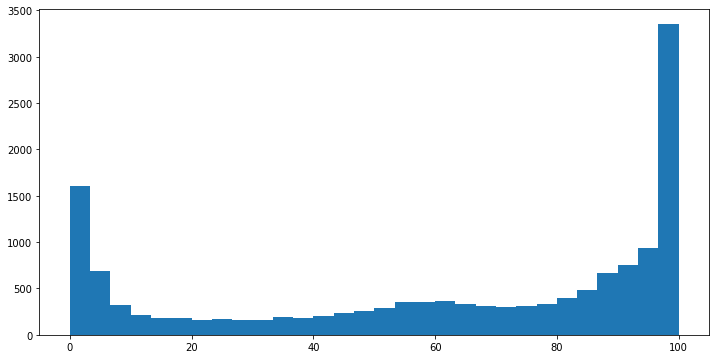

In [333]:
plt.figure(figsize=(12,6))
plt.hist(predict_prob[:,0]*100 ,30)

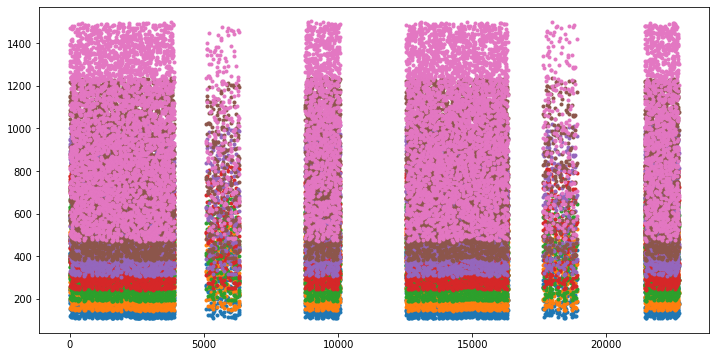

In [334]:
duresius = pd.read_excel('Train_dataset.xlsx', 'Diuresis_TS')
csv_d=pd.read_csv('train_data_Diuresis_TS.csv')
col=csv_d.columns
col
selected_col=['43910.0', '43911.0', '43912.0', '43913.0', '43914.0',
       '43915.0', '43916.0']
plt.figure(figsize=(12,6))
plt.plot(csv_d['people_ID'],csv_d[selected_col],'.')

(array([363., 358., 340., 373., 343., 341., 401., 366., 313., 374., 395.,
        362., 384., 396., 352., 347., 352., 340., 361., 329., 328., 371.,
        348., 353., 368., 345., 356., 388., 293., 374.]),
 array([110.        , 121.33333333, 132.66666667, 144.        ,
        155.33333333, 166.66666667, 178.        , 189.33333333,
        200.66666667, 212.        , 223.33333333, 234.66666667,
        246.        , 257.33333333, 268.66666667, 280.        ,
        291.33333333, 302.66666667, 314.        , 325.33333333,
        336.66666667, 348.        , 359.33333333, 370.66666667,
        382.        , 393.33333333, 404.66666667, 416.        ,
        427.33333333, 438.66666667, 450.        ]),
 <a list of 30 Patch objects>)

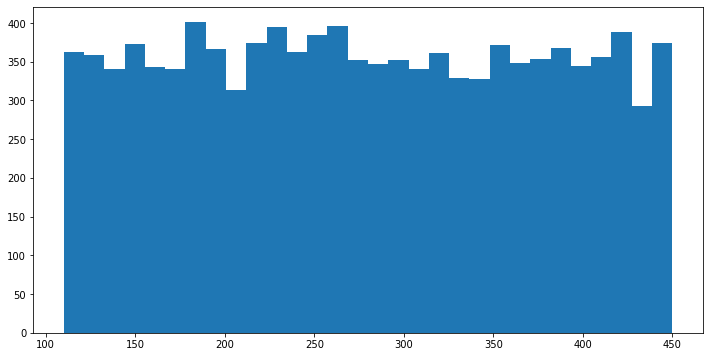

In [335]:
plt.figure(figsize=(12,6))
plt.hist(csv_d['43910.0'],30)

(array([313., 371., 364., 349., 370., 341., 385., 370., 341., 357., 401.,
        379., 361., 406., 363., 331., 368., 341., 358., 329., 356., 355.,
        357., 364., 354., 346., 367., 375., 314., 328.]),
 array([145. , 158.7, 172.4, 186.1, 199.8, 213.5, 227.2, 240.9, 254.6,
        268.3, 282. , 295.7, 309.4, 323.1, 336.8, 350.5, 364.2, 377.9,
        391.6, 405.3, 419. , 432.7, 446.4, 460.1, 473.8, 487.5, 501.2,
        514.9, 528.6, 542.3, 556. ]),
 <a list of 30 Patch objects>)

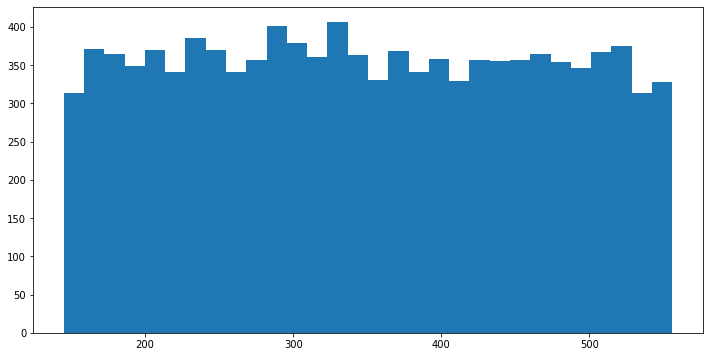

In [336]:
plt.figure(figsize=(12,6))
plt.hist(csv_d['43911.0'],30)

In [337]:
plt.figure(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

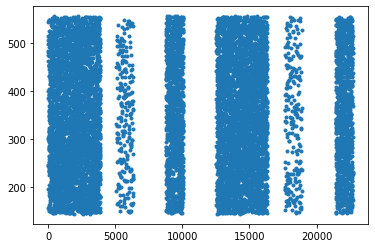

In [338]:
plt.plot(csv_d['people_ID'],csv_d[selected_col[1]],'.')

In [339]:
record_of_people_5000=csv_d[csv_d['people_ID']<100]

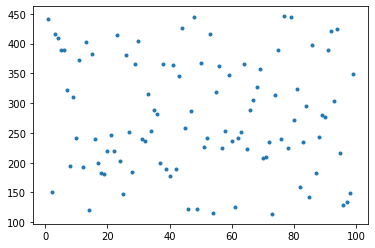

In [340]:
plt.plot(record_of_people_5000['people_ID'],record_of_people_5000[selected_col[0]],'.')

In [341]:
cols_to_remove = ['people_ID'] 
csv_d = csv_d.drop(cols_to_remove, axis=1) 
csv_d.columns
from sklearn.linear_model import LinearRegression
X= csv_d.iloc[:,:-1].values
y= csv_d.iloc[:,6].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
reg_model = LinearRegression() 
reg_model.fit(X_train, y_train) 
print(reg_model.score(X_test, y_test)) 

0.9999907929322298


In [342]:
regr.predict(X_test)

array([ 812.97069857,  480.81142897,  762.38136353, ...,  740.16065116,
       1219.40961398, 1216.16458856])